# Spark vs Flink

### All data in the same window

In [90]:
#Load the data
import pandas as pd
raw_spark_1c = pd.read_csv('benchmark_flow_spark_10k_1cores').sort_values("ts_output")
raw_flink_1c = pd.read_csv('benchmark_flow_flink_10k_1cores').sort_values("ts_output")

In [43]:
spark_total_time_1c = raw_spark_1c['ts_output'].max() - raw_spark_1c['ts_output'].min()
print("Total time spark (ms):", spark_total_time_1c)

flink_total_time_1c = raw_flink_1c['ts_output'].max() - raw_flink_1c['ts_output'].min()
print("Total time flink (ms):", flink_total_time_1c)

Total time spark (ms): 45126
Total time flink (ms): 45836


In [76]:
#Load the data
import pandas as pd
raw_spark = pd.read_csv('benchmark_flow_spark_10k_8cores').sort_values("ts_output")
raw_flink = pd.read_csv('benchmark_flow_flink_10k_8cores').sort_values("ts_output")

In [2]:
spark_service_time = raw_spark['ts_output'] - (raw_spark['ts_flow1']+raw_spark['ts_flow2'])/2
print("Spark description time (ms):\n", spark_service_time.describe())
print()
flink_service_time = raw_flink['ts_output'] - (raw_flink['ts_flow1']+raw_flink['ts_flow2'])/2
print("Flink description time (ms):\n", flink_service_time.describe())

Spark description time (ms):
 count    1.917459e+06
mean     1.831892e+04
std      1.183449e+04
min      4.985000e+02
25%      8.890000e+03
50%      1.433350e+04
75%      2.727375e+04
max      4.345450e+04
dtype: float64

Flink description time (ms):
 count    1.917459e+06
mean     2.442807e+04
std      1.158571e+04
min      7.956000e+03
25%      1.466050e+04
50%      2.077850e+04
75%      3.443950e+04
max      4.938900e+04
dtype: float64


In [40]:
print((raw_spark['ts_output'] - raw_spark['ts_output'].min()).min())
print((raw_spark['ts_output'] - raw_spark['ts_output'].min()).max())

0
41502


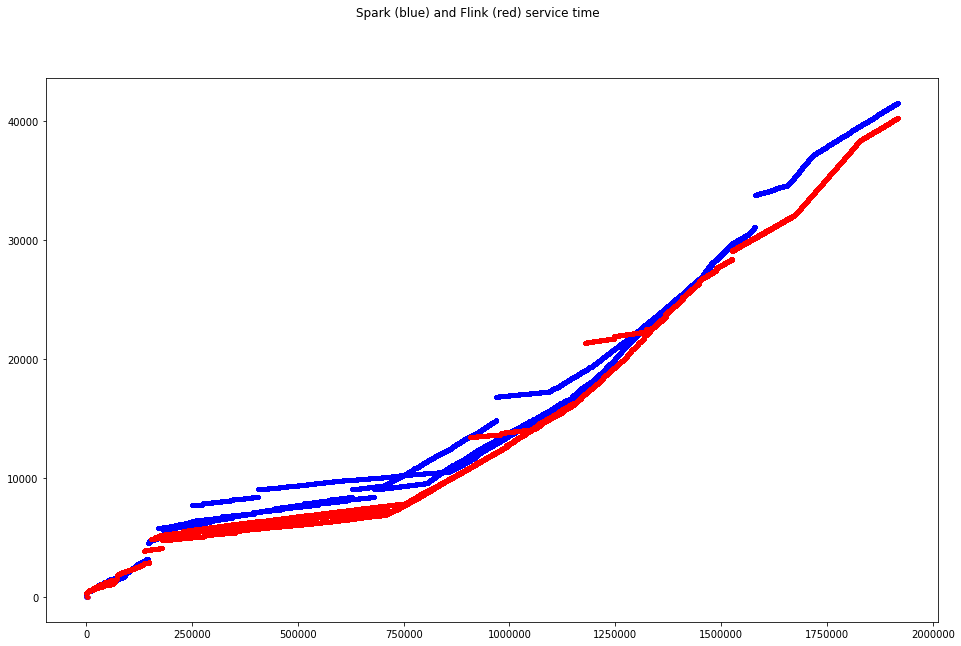

In [39]:

fig = plt.figure(figsize = (16, 10))
fig.suptitle('Spark (blue) and Flink (red) service time')
plt.plot(raw_spark['ts_output'] - raw_spark['ts_output'].min(), '.b')
plt.plot(raw_flink['ts_output'] - raw_flink['ts_output'].min(), '.r')

plt.show()
#Hay información muy interesante, los "branches" son fenomeno de la paralelización


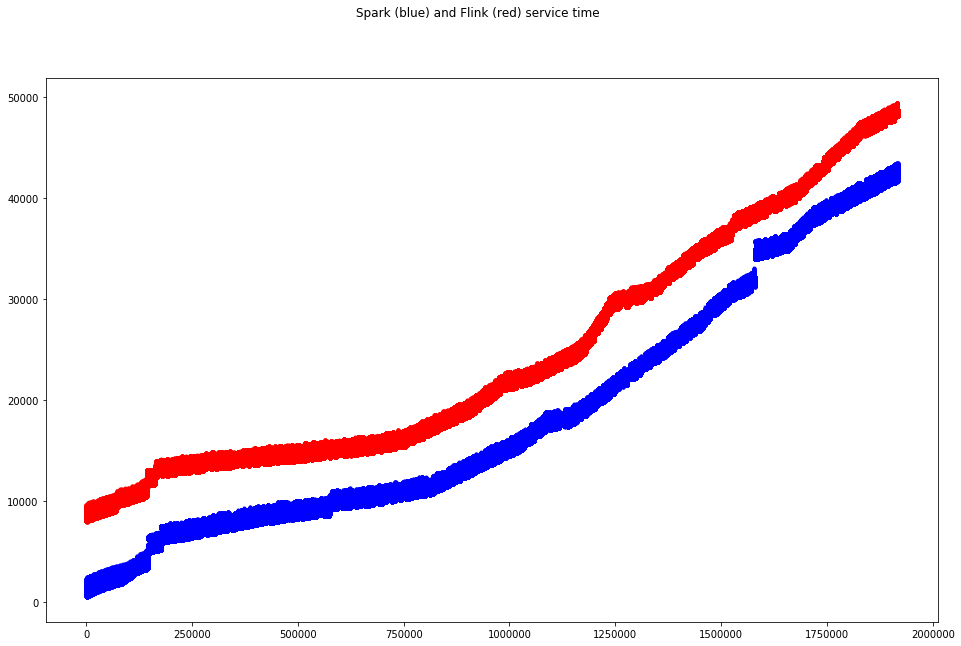

In [34]:

fig = plt.figure(figsize = (16, 10))
fig.suptitle('Spark (blue) and Flink (red) service time')

x1 = range(len(spark_service_time))
plt.plot(x1, spark_service_time, '.b')

x2 = range(len(flink_service_time))
plt.plot(x2, flink_service_time, '.r')

plt.show()

### Data in distinct windows

In [1]:
import pandas as pd
raw_spark = pd.read_csv('benchmark_flow_spark_50k_8cores_2').sort_values("ts_output")
raw_flink = pd.read_csv('benchmark_flow_flink_50k_8cores_2').sort_values("ts_output")

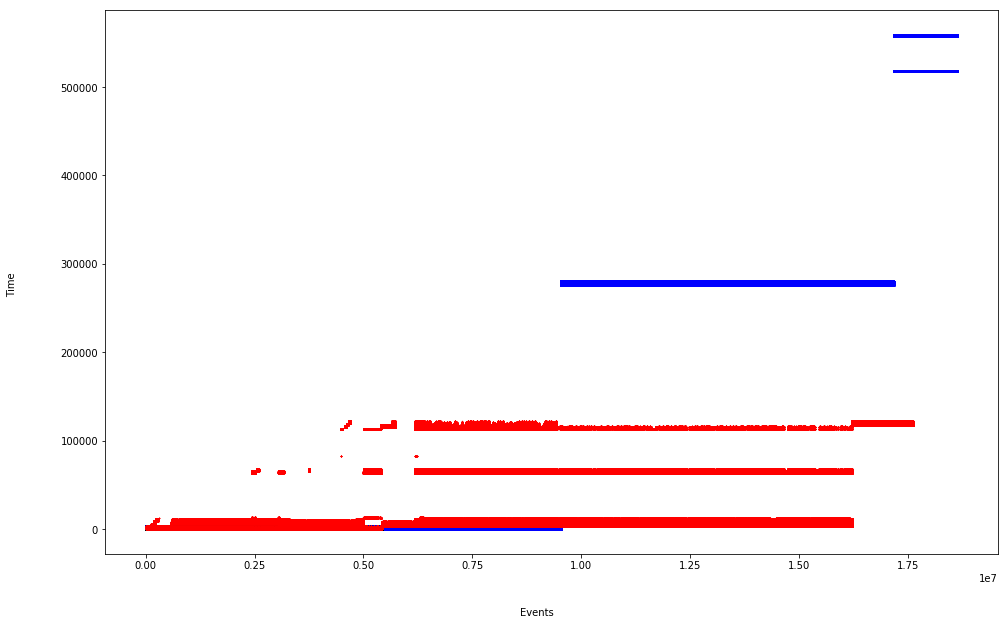

In [27]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (16, 10))
fig.text(0.5, 0.04, 'Events', ha='center')
fig.text(0.04, 0.5, 'Time', va='center', rotation='vertical')

plt.plot(raw_spark['ts_flow1'] - raw_spark['ts_flow1'].min(), '.b',  markersize=1)
plt.plot(raw_flink['ts_flow1'] - raw_flink['ts_flow1'].min(), '.r',  markersize=1)

plt.show()

In [14]:
spark_total_time = raw_spark['ts_output'].max() - raw_spark['ts_output'].min()
print("Total time spark (ms):", spark_total_time)

flink_total_time = raw_flink['ts_output'].max() - raw_flink['ts_output'].min()
print("Total time flink (ms):", flink_total_time)

Total time spark (ms): 614154
Total time flink (ms): 869291


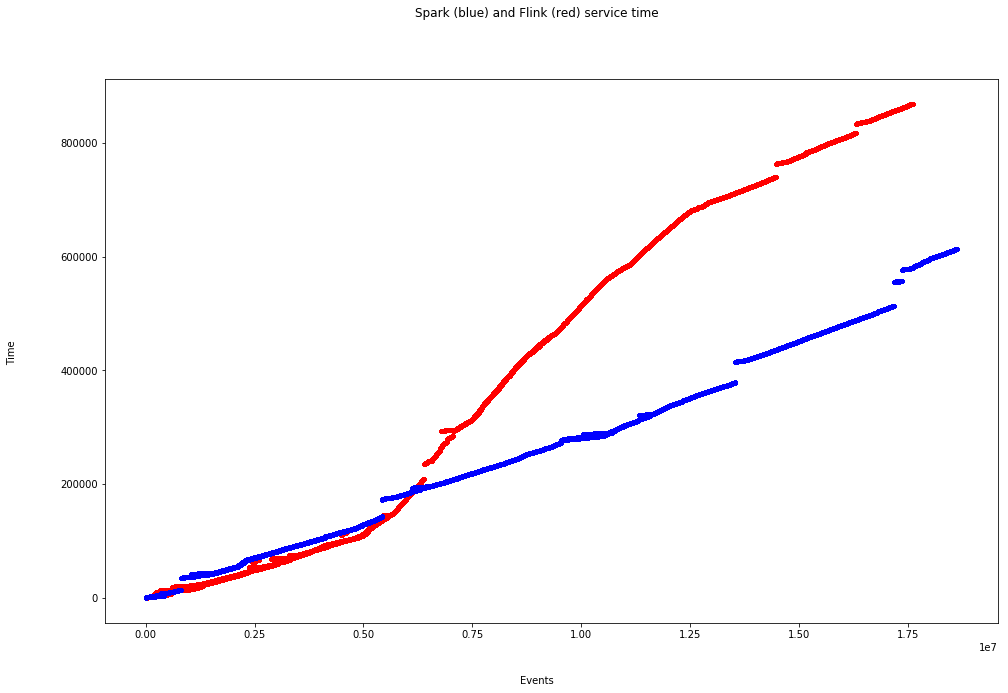

In [26]:
fig = plt.figure(figsize = (16, 10))
fig.suptitle('Spark (blue) and Flink (red) service time')
fig.text(0.5, 0.04, 'Events', ha='center')
fig.text(0.04, 0.5, 'Time', va='center', rotation='vertical')

plt.plot(raw_flink['ts_output'] - raw_flink['ts_output'].min(), '.r')
plt.plot(raw_spark['ts_output'] - raw_spark['ts_output'].min(), '.b')

plt.show()

In [10]:
count = raw_flink.groupby('ts_output').count()
ix = count.index
paralellism = count["eventid_1"].values

pd_tmp = pd.DataFrame(count["eventid_1"])
pd_tmp["ts_output"] = count["eventid_1"].index
res_flink = raw_flink.merge(pd_tmp,on="ts_output")[["ts_output","eventid_1_y"]]

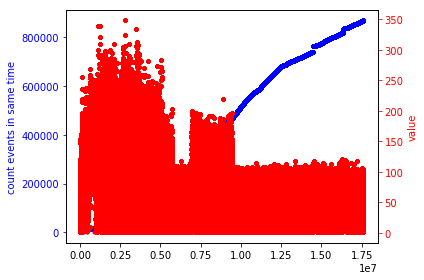

In [22]:
fig, ax1 = plt.subplots()


ax2 = ax1.twinx()
ax2.plot(res_flink['eventid_1_y'], 'r.')
ax2.set_ylabel('value', color='r')
ax2.tick_params('y', colors='r')

ax1.plot(res_flink['ts_output'] - res_flink['ts_output'].min(), 'b.')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('count events in same time', color='b')
ax1.tick_params('y', colors='b')


fig.tight_layout()
plt.show()


In [23]:
print("Max values same time: ", res_flink['eventid_1_y'].max())
print("Mean values same time; ", res_flink['eventid_1_y'].mean())

import numpy as np
bins = np.linspace(res_flink["ts_output"].min(), res_flink["ts_output"].max(), len(res_flink) / 1000)
groups = res_flink.groupby(np.digitize(res_flink["ts_output"], bins))
throughtput_flink = groups.aggregate(lambda x: np.mean(x))

print("Throughput flink: ", throughtput_flink['eventid_1_y'].mean())

Max values same time:  348
Mean values same time;  81.0787673037


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


Throughput flink:  71.9453278593


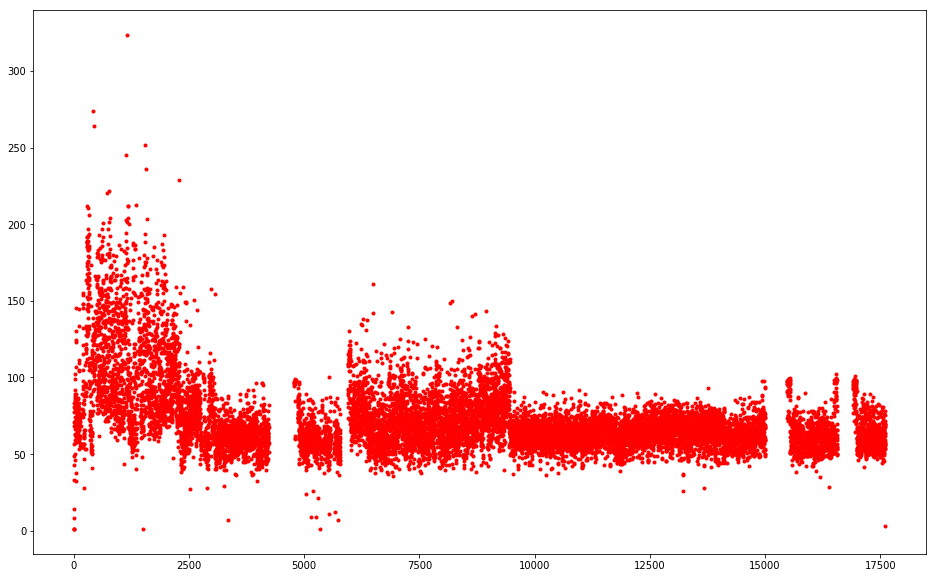

In [24]:
#throughput!

fig = plt.figure(figsize = (16, 10))
plt.plot(throughtput_flink['eventid_1_y'], '.r')

plt.show()

In [25]:
count = raw_spark.groupby('ts_output').count()
ix = count.index
paralellism = count["eventid_1"].values

pd_tmp = pd.DataFrame(count["eventid_1"])
pd_tmp["ts_output"] = count["eventid_1"].index
res_spark = raw_spark.merge(pd_tmp,on="ts_output")[["ts_output","eventid_1_y"]]

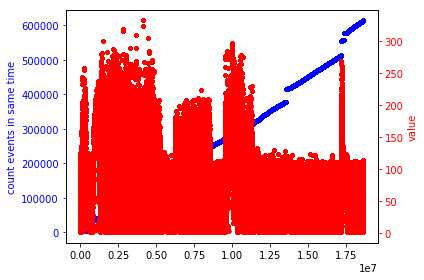

In [26]:
fig, ax1 = plt.subplots()


ax2 = ax1.twinx()
ax2.plot(res_spark['eventid_1_y'], 'r.')
ax2.set_ylabel('value', color='r')
ax2.tick_params('y', colors='r')

ax1.plot(res_spark['ts_output'] - res_spark['ts_output'].min(), 'b.')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('count events in same time', color='b')
ax1.tick_params('y', colors='b')


fig.tight_layout()
plt.show()

In [27]:
print("Max values same time: ", res_spark['eventid_1_y'].max())
print("Mean values same time; ", res_spark['eventid_1_y'].mean())

import numpy as np
bins = np.linspace(res_spark["ts_output"].min(), res_spark["ts_output"].max(), len(res_spark) / 1000)
groups = res_spark.groupby(np.digitize(res_spark["ts_output"], bins))
throughput_spark = groups.aggregate(lambda x: np.mean(x))

print("Throughput Spark: ", throughput_spark['eventid_1_y'].mean())

Max values same time:  332
Mean values same time;  89.6836436524


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


Throughput Spark:  81.0318598796


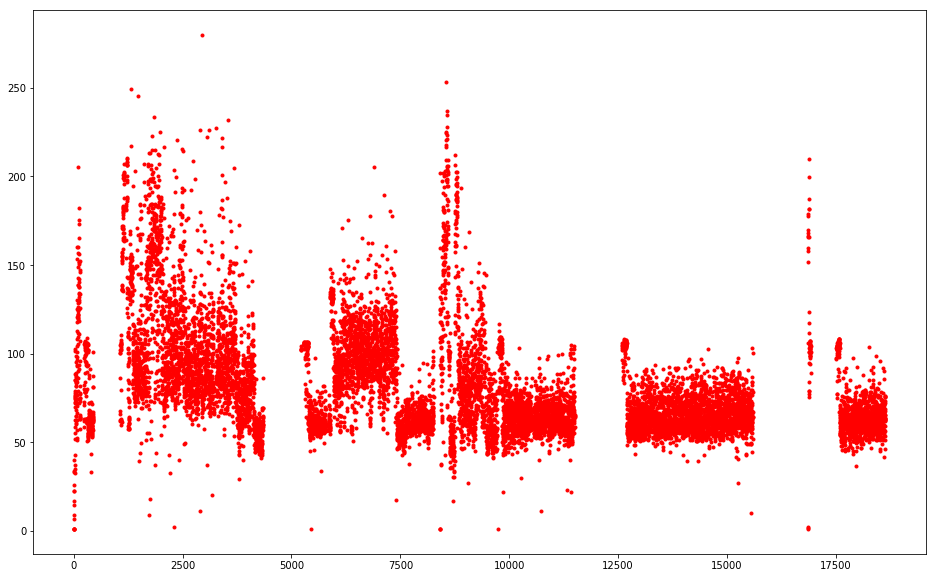

In [28]:
#throughput!

fig = plt.figure(figsize = (16, 10))
plt.plot(throughput_spark['eventid_1_y'], '.r')

plt.show()

## Results

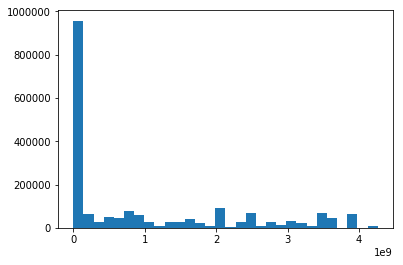

In [91]:
import matplotlib.pyplot as plt
import numpy as np

x = raw_flink_1c["distance"]
plt.hist(x, normed=False, bins=30)
plt.show()

In [92]:
x[ x > 4e9].shape

(8118,)

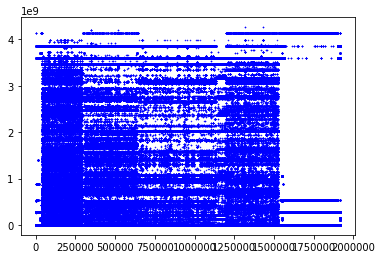

In [96]:
plt.plot(raw_flink_1c["distance"], '.b', markersize=1)

plt.show()